In [28]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from scipy.stats import pearsonr
from scipy.io import readsav
from glob import glob
from tqdm import tqdm
from scipy.io import readsav
from sklearn.preprocessing import normalize
from matplotlib.patches import Circle
import array as arr

In [29]:
#Test Matrix
a= np.matrix('1 2 3; 3 4 8')
print (a)

[[1 2 3]
 [3 4 8]]


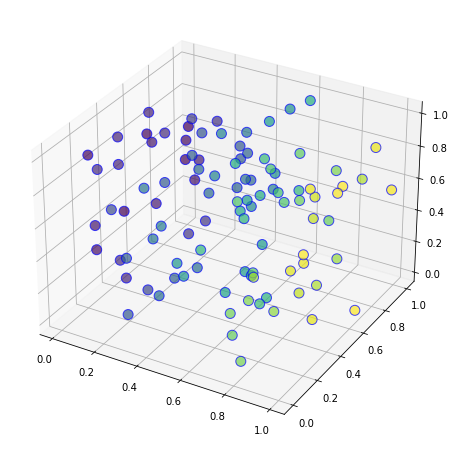

In [30]:
#TEST Plotting in 3D
x=np.random.rand(100)
y=np.random.rand(100)
z=np.random.rand(100)
fig = plt.figure(figsize=(8,8))#scale of graph
ax = fig.add_subplot(111,
                     projection='3d')#makes the graph 3d
ax.scatter(x, y, z,#Adds axis to plot points
           linewidths=1, alpha=.7,
           edgecolor='blue',#changes the color of borders of points
           s = 100,#changes size of points
           c=x)
plt.show()

# First Attempt
* I used list instead of arrays
* If statments are harder to make with list 

# Second Attempt
* This time we will use arrays instead of list

###### here are just some test to see what i can and cant do with defining an array 
test=np.array([1,2,3])
print(test)
test2= np.array([input(), 2,3])
print (test2)

In [90]:
#User Input Points
pntA= np.array([int(input("Input Ax:")),int(input("Input Ay:")),int(input("Input Az:"))])  
pntB= np.array([int(input("Input Bx:")),int(input("Input By:")),int(input("Input Bz:"))])
pntG= np.array([int(input("Input Gx:")),int(input("Input Gy:")),int(input("Input Gz:"))]) 
print(pntA,pntB,pntG)

Input Ax:12
Input Ay:1
Input Az:17
Input Bx:5
Input By:2
Input Bz:11
Input Gx:12
Input Gy:45
Input Gz:8
[12  1 17] [ 5  2 11] [12 45  8]


In [91]:
#calculating vectors
AB=pntB-pntA
AG=pntG-pntA
BG=pntG-pntB
print("AB:",AB,"AG:",AG,"BG:",BG)

#Creating Unit vectors using (np.linalg.norm) to normalize them
normAB =np.linalg.norm(AB)
U1=AB/normAB #Normalized vector
print("||AB||:",normAB)
print("U1:",U1)
#Calculating the other Unit Vectors 
U3=np.cross(AB,AG) / np.linalg.norm(np.cross(AB,AG))
U2= np.cross(U1,U3)/ np.linalg.norm(np.cross(U1,U3))
print("U2:",U2)
print("U3:",U3)

AB: [-7  1 -6] AG: [ 0 44 -9] BG: [ 7 43 -3]
||AB||: 9.273618495495704
U1: [-0.75482941  0.10783277 -0.64699664]
U2: [-0.18274313 -0.98191135  0.04954843]
U3: [ 0.6299504  -0.1556348  -0.76088127]


In [80]:
#Creating if statment to calculate d 
if all(AG*U1)>0 and all(AG*U1)<normAB:#Case1
    d=abs(np.cross(pntA-pntB,pntA-pntG))/abs(pntG-pntB)
if all(AG*U1)<0:#Case2
    d=np.linalg.norm(AG)
if all(AG*U1)>(normAB):#Case3
    d=np.linalg.norm(BG)
print(d)

[ 0.19178082 82.66666667 69.5       ]


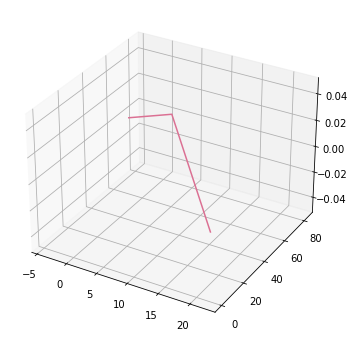

In [82]:
#Plotting ther point and segments
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,
                     projection='3d')
plt.plot(AB,d,color='palevioletred')
plt.show()

# Creating an 100 galaxy mock catalog 
* Now I will create a much larger catalog to see how the code runs over a loop

In [59]:
#100 point catalog
pntG=np.random.rand(100,3)
print(pntG.shape)
print(pntG[1])

(100, 3)
[0.58541837 0.02430527 0.98885604]


In [42]:
#Calling the columns as variables 
Gx=pntG[...,0]
Gy=pntG[...,1]
Gz=pntG[...,2]

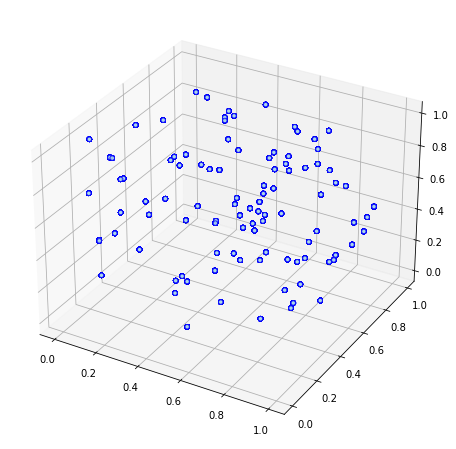

In [43]:
#Polotting Test 
ax = plt.figure(figsize=(8,8)).add_subplot(projection='3d')
for i in range (0,100):
    ax.scatter(Gx,Gy,Gz,c='lightblue',alpha=.8,edgecolor='blue')
plt.show()

In [48]:
#Segments 
s1=np.array([0,0,.2])
s2=np.array([.3,.5,.5])
s3=np.array([.80,.90,.80])
s4= np.array([1,.7,.9])

print(s1,s2,s3,s4)

#Making Vectors
s12=s2-s1
s23=s3-s2
s34=s4-s3
print(s12,s23,s34)

#Calculating vectors
norm12 =np.linalg.norm(s12)
norm23 =np.linalg.norm(s23)
norm34 =np.linalg.norm(s34)
u1=s12/norm12
u2=s23/norm23
u3=s34/norm34


[0.  0.  0.2] [0.3 0.5 0.5] [0.8 0.9 0.8] [1.  0.7 0.9]
[0.3 0.5 0.3] [0.5 0.4 0.3] [ 0.2 -0.2  0.1]
[0.11803817 0.95482726 0.63666671]


In [84]:
#vector from galaxy to segment edge 
Sg1=[]
Sg2=[]
Sg3=[]
Sg4=[]
for i in range (100): #Picking each row as a galaxy 
    s1len=(pntG[i])-s1
    s2len=(pntG[i])-s2
    s3len=(pntG[i])-s3
    s4len=(pntG[i])-s4
    Sg1.append(s1len)
    Sg2.append(s2len)
    Sg3.append(s3len)
    Sg4.append(s4len)


[ 0.46702389  0.21470175 -0.11056592]


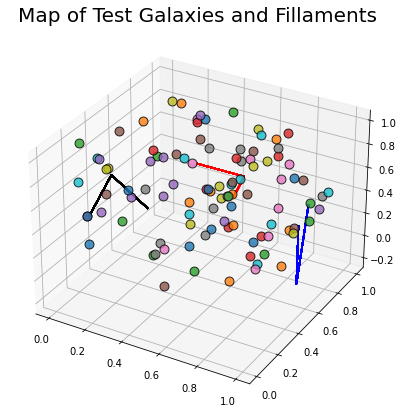

In [50]:
#Plotting Galaxies and Fillaments
ax = plt.figure(figsize=(7,7)).add_subplot(projection='3d',facecolor='w')
for i in range (0,100):
    ax.scatter(Gx[i],Gy[i],Gz[i],s=80,cmap='viridis',alpha=.8,edgecolor='black')
    ax.plot(s1,s2,s12,color='k')#So im not sure why they are bent like that but i'm very close
    ax.plot(s2,s3,s23,color='red')
    ax.plot(s3,s4,s34,color='blue')
ax.set_title("Map of Test Galaxies and Fillaments",size=20)
plt.show()

In [ ]:
#To remind Myself The Structure I coppied the code aboce 
if all(AG*U1)>0 and all(AG*U1)<normAB:#Case1
    d=abs(np.cross(pntA-pntB,pntA-pntG))/abs(pntG-pntB)
if all(AG*U1)<0:#Case2
    d=np.linalg.norm(AG)
if all(AG*U1)>(normAB):#Case3
     d=np.linalg.norm(BG)  

In [75]:
#Looping and calculating distances

dint=1000
#First segments is s12 where s1 is our A and s2 is out B
for i in range (99):
    if all(Sg1[i]*u1)>0 and all(Sg1[i]*u1)<(norm12):
        d=abs(np.cross(s1-s2,s1-G[i])/abs(G[i]-s2))
        if d < dint:
             dint=d 
    
    if all(Sg1[i]*u1)<0:
        d=np.linalg.norm(Sg1[i])
        if d < dint:
                dint=d 

    if all(Sg1[i]*u1)>(norm12):
        d=np.linalg.norm(Sg2[i])
        if d < dint:
                dint=d 
            
#Second Segment is s23 where s2 is our new A and s3 is our B
    if all(Sg2[i]*u2)>0 and all(Sg2[i]*u2)<(norm23):
        d=abs(np.cross(s2-s3,s2-G[i])/abs(G[i]-s3))
        if d < dint:
                dint=d 

    if all(Sg2[i]*u2)<0:
        d=np.linalg.norm(Sg2[i])
        if d < dint:
                dint=d 

    if all(Sg2[i]*u2)>(norm23):
        d=np.linalg.norm(Sg3[i])
        if d < dint:
                dint=d 

#Third Segment is s34 where s3 is our new A and s4 is our B
    if all (Sg3[i]*u3)>0 and all(Sg3*u3)<(norm34):
        d=abs(np.cross(s3-s4,s3-G[i])/abs(G[i]-s4))
        if d < dint:
                dint=d 

    if all(Sg3[i]*u3)<0:
         d=np.linalg.norm(SG3[i])
        if d < dint:
                dint=d 
    
    if all(Sg3[i]*u3)>(norm34):
        d=np.linalg.norm(SG4[i])
        if d < dint:
                dint=d 


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 45)

In [89]:
dint=1000
dis=np.zeros(100)
for i in range (99):
    if all(Sg1[i]*u1)>0 and all(Sg1[i]*u1)<(norm12):
        d=abs(np.cross(s1-s2,s1-G[i])/abs(G[i]-s2))
        if d < dint:
             dis.fill(d) 
    if all(Sg1[i]*u1)<0:
        d=np.linalg.norm(Sg1[i])
        if d < dint:
            dis.fill(d)  

    if all(Sg1[i]*u1)>(norm12):
        d=np.linalg.norm(Sg2[i])
        if d < dint:
            dis.fill(d)  
print(dis)

[0.0550043 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043
 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043
 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043
 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043
 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043
 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043
 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043
 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043
 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043
 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043
 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043
 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043
 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043
 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043 0.0550043
 0.055